<a href="https://colab.research.google.com/github/ljy9969/Study/blob/master/22_03_16~17_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/타이타닉/train.csv')
test = pd.read_csv('/content/drive/MyDrive/타이타닉/test.csv')

In [2]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [3]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
train.shape

(891, 12)

In [5]:
test.shape

(418, 11)

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns # matplot 대신 seaborn으로 데이터 시각화
sns.set() # setting seaborn default for plots

In [9]:
def bar_chart(feature): # 바 그래프 보여주는 함수
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

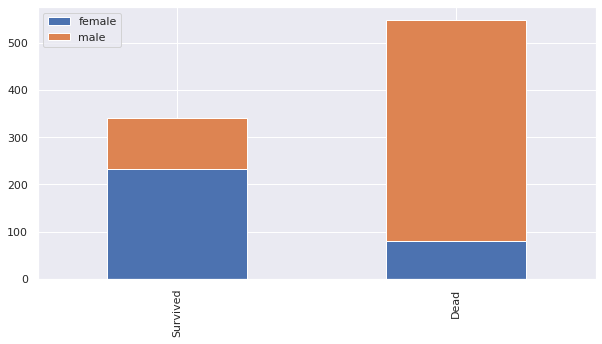

In [10]:
bar_chart('Sex') # 여자가 살 확률이 높다

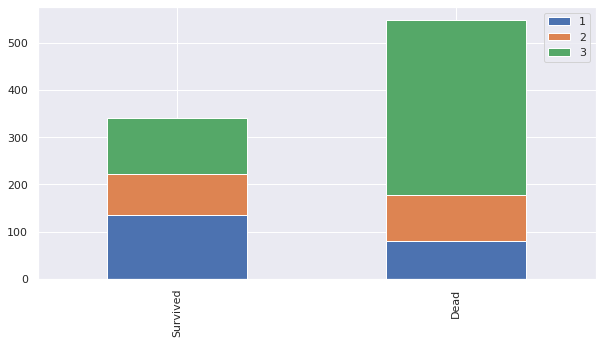

In [11]:
bar_chart('Pclass') # 3등급이 많이 죽었다

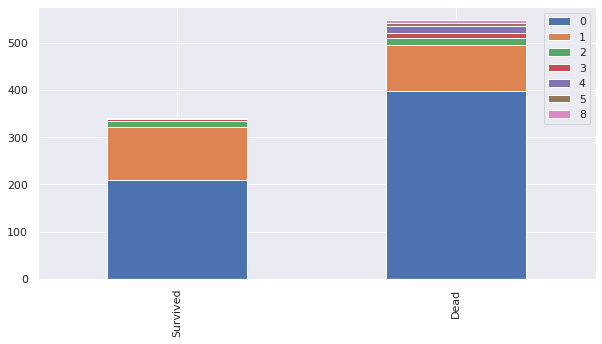

In [12]:
bar_chart('SibSp') # 가족이 있으면 살 확률이 높다

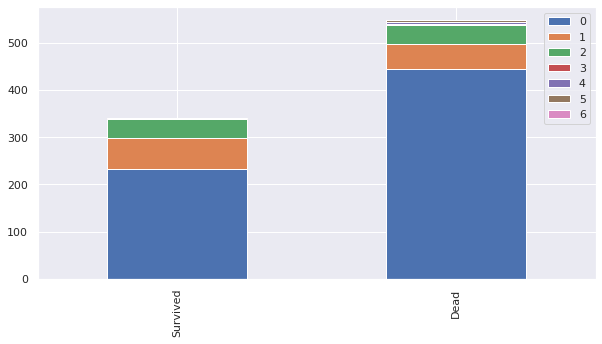

In [13]:
bar_chart('Parch') # 가족이 있으면 살 확률이 높다

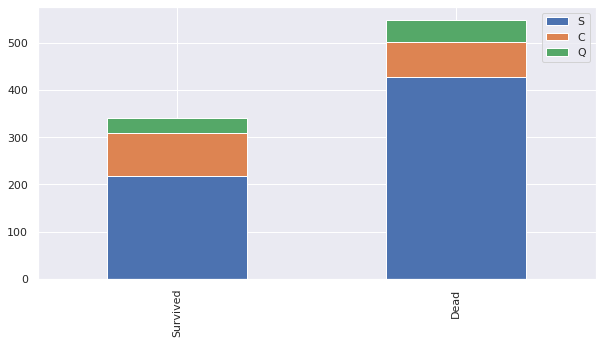

In [14]:
bar_chart('Embarked') # 탑승지가 영향을 그닥 주지는 않는 것 같다

In [15]:
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [16]:
train['Title'].value_counts() # Mr, Miss, Mrs 호칭의 갯수 확인

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [17]:
test['Title'].value_counts() # Mr, Miss, Mrs 호칭의 갯수 확인

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [18]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [19]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Title  
0      0         A/5 21171   7.2500   NaN        S      0  
1      0          PC 17599  71.2833   C85        C      2  
2      0  STON/O2. 3101282   7.9250   NaN        S      1  
3      0            113803  53.1000  C123        S      2  
4      0            373450   8.0500   NaN        S      0

In [20]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Title  
0  34.5      0      0   330911   7.8292   NaN        Q      0  
1  47.0      1      0   363272   7.0000   NaN        S      2  
2  62.0      0      0   240276   9.6875   NaN        Q      0  
3  27.0      0      0   315154   8.6625   NaN        S      0  
4  22.0      1      1  3101298  12.2875   NaN        S      2

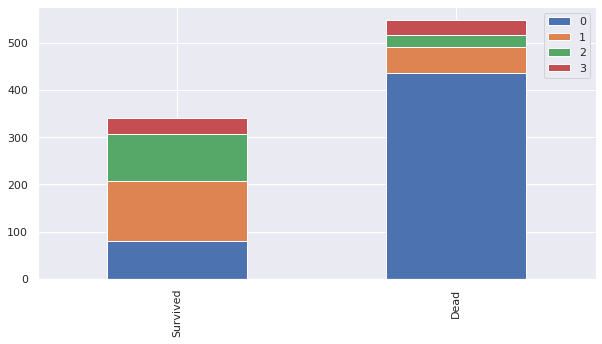

In [21]:
bar_chart('Title') # Mr가 상대적으로 많이 죽고, Miss, Mrs가 많이 살았다

In [22]:
# delete unnecessary feature from dataset 이름 지우기
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [23]:
train.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  Title  
0         A/5 21171   7.2500   NaN        S      0  
1          PC 17599  71.2833   C85        C      2  
2  STON/O2. 3101282   7.9250   NaN        S      1  
3            113803  53.1000  C123        S      2  
4            373450   8.0500   NaN        S      0

In [26]:
test.head()

PassengerId  Pclass  Sex   Age  SibSp  Parch   Ticket     Fare Cabin  \
0          892       3    0  34.5      0      0   330911   7.8292   NaN   
1          893       3    1  47.0      1      0   363272   7.0000   NaN   
2          894       2    0  62.0      0      0   240276   9.6875   NaN   
3          895       3    0  27.0      0      0   315154   8.6625   NaN   
4          896       3    1  22.0      1      1  3101298  12.2875   NaN   

  Embarked  Title  
0        Q      0  
1        S      2  
2        Q      0  
3        S      0  
4        S      2

In [25]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

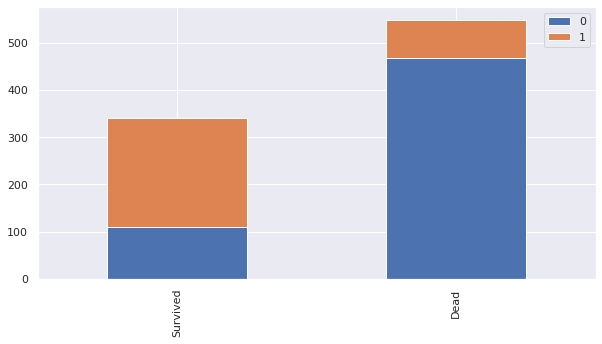

In [27]:
bar_chart('Sex') # 남자가 많이 죽었다

In [28]:
# NaN에 평균 나이 넣는 것이 아니라 호칭에 따른 평균값을 넣기
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [30]:
train.head(30)
train.groupby("Title")["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

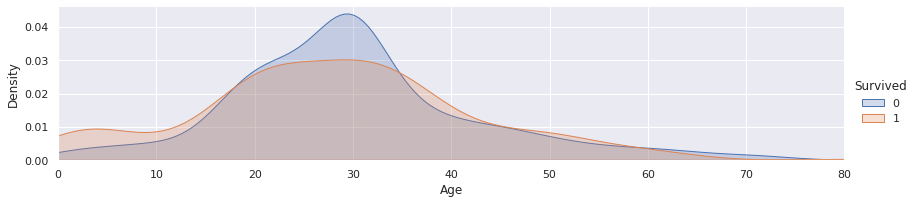

In [31]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4) # (0: 사망, 1: 생존)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show() # 젊은 층이 상대적으로 많이 죽었다 

(0.0, 20.0)

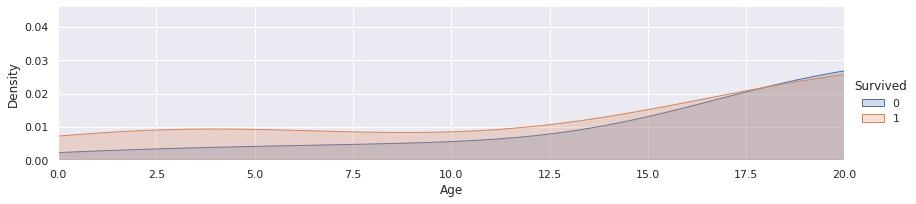

In [32]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4) # 0 ~ 20살
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

(20.0, 30.0)

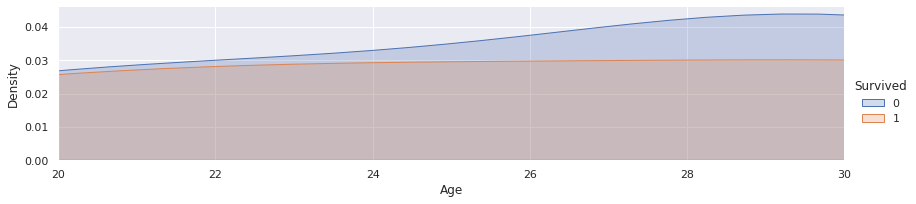

In [33]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4) # 20 ~ 30살
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)

(30.0, 40.0)

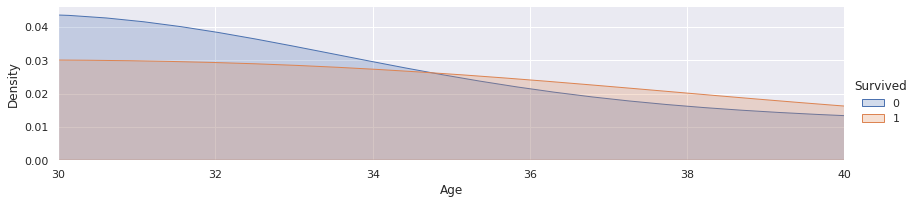

In [35]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4) # 30 ~ 40살
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(30, 40)

(40.0, 60.0)

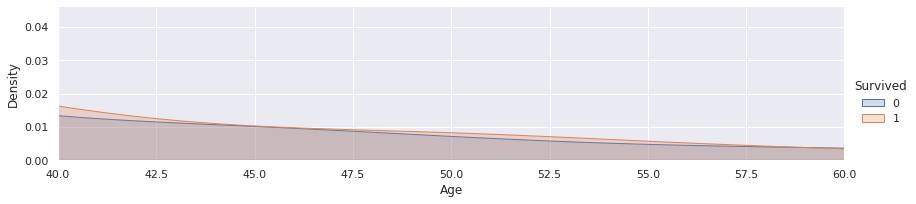

In [36]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4) # 40 ~ 60살
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

(60.0, 80.0)

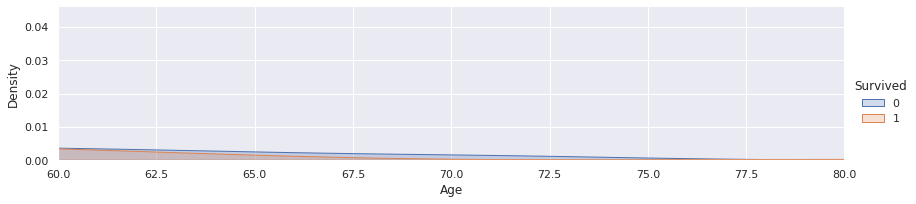

In [38]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(60)

In [59]:
# for dataset in train_test_data:                                               # 반복문 설정 시 key와 value의 길이가 같아야 -> 조건문을 쪼개주자
#   dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
#   dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
#   dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
#   dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
#   dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

ValueError: ignored

In [60]:
for dataset in train_test_data:
  dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0

In [61]:
for dataset in train_test_data:
  dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1

In [62]:
for dataset in train_test_data:
  dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2

In [63]:
for dataset in train_test_data:
  dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3

In [64]:
for dataset in train_test_data:
  dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [65]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0  1.0      1      0         A/5 21171   
1            2         1       1    1  3.0      1      0          PC 17599   
2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
3            4         1       1    1  2.0      1      0            113803   
4            5         0       3    0  2.0      0      0            373450   

      Fare Cabin Embarked  Title  
0   7.2500   NaN        S      0  
1  71.2833   C85        C      2  
2   7.9250   NaN        S      1  
3  53.1000  C123        S      2  
4   8.0500   NaN        S      0

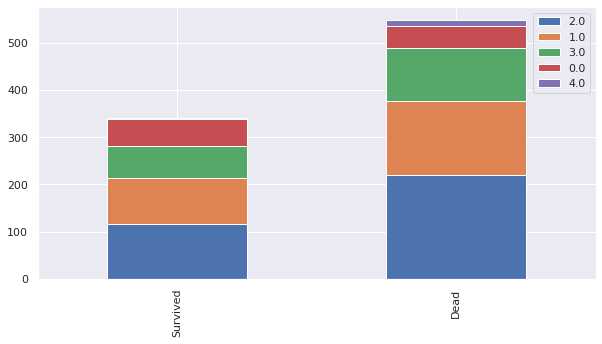

In [66]:
bar_chart('Age') # 나이대별 생존률

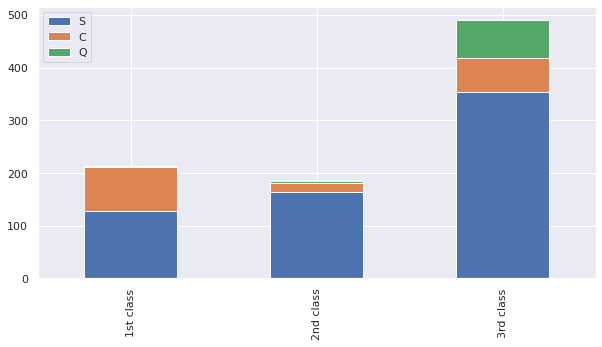

In [67]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts() # 탑승지와 좌석 등급이 생존율에 영향을 미치나? 등급별로 S에서 탄 비율이 반 이상
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [68]:
for dataset in train_test_data: # 탑승지 NaN을 S로 채우기
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [69]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0  1.0      1      0         A/5 21171   
1            2         1       1    1  3.0      1      0          PC 17599   
2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
3            4         1       1    1  2.0      1      0            113803   
4            5         0       3    0  2.0      0      0            373450   

      Fare Cabin Embarked  Title  
0   7.2500   NaN        S      0  
1  71.2833   C85        C      2  
2   7.9250   NaN        S      1  
3  53.1000  C123        S      2  
4   8.0500   NaN        S      0

In [70]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2} # 탑승지를 숫자로 매핑
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [71]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True) # 
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(50)

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0             1         0       3    0  1.0      1      0         A/5 21171   
1             2         1       1    1  3.0      1      0          PC 17599   
2             3         1       3    1  1.0      0      0  STON/O2. 3101282   
3             4         1       1    1  2.0      1      0            113803   
4             5         0       3    0  2.0      0      0            373450   
5             6         0       3    0  2.0      0      0            330877   
6             7         0       1    0  3.0      0      0             17463   
7             8         0       3    0  0.0      3      1            349909   
8             9         1       3    1  2.0      0      2            347742   
9            10         1       2    1  0.0      1      0            237736   
10           11         1       3    1  0.0      1      1           PP 9549   
11           12         1       1    1  3.0      0      0            113783   
12           13         0       3    0  1.0      0      0         A/5. 2151   
13           14         0       3    0  3.0      1      5            347082   
14           15         0       3    1  0.0      0      0            350406   
15           16         1       2    1  3.0      0      0            248706   
16           17         0       3    0  0.0      4      1            382652   
17           18         1       2    0  2.0      0      0            244373   
18           19         0       3    1  2.0      1      0            345763   
19           20         1       3    1  2.0      0      0              2649   
20           21         0       2    0  2.0      0      0            239865   
21           22         1       2    0  2.0      0      0            248698   
22           23         1       3    1  0.0      0      0            330923   
23           24         1       1    0  2.0      0      0            113788   
24           25         0       3    1  0.0      3      1            349909   
25           26         1       3    1  3.0      1      5            347077   
26           27         0       3    0  2.0      0      0              2631   
27           28         0       1    0  1.0      3      2             19950   
28           29         1       3    1  1.0      0      0            330959   
29           30         0       3    0  2.0      0      0            349216   
30           31         0       1    0  3.0      0      0          PC 17601   
31           32         1       1    1  2.0      1      0          PC 17569   
32           33         1       3    1  1.0      0      0            335677   
33           34         0       2    0  4.0      0      0        C.A. 24579   
34           35         0       1    0  2.0      1      0          PC 17604   
35           36         0       1    0  3.0      1      0            113789   
36           37         1       3    0  2.0      0      0              2677   
37           38         0       3    0  1.0      0      0        A./5. 2152   
38           39         0       3    1  1.0      2      0            345764   
39           40         1       3    1  0.0      1      0              2651   
40           41         0       3    1  3.0      1      0              7546   
41           42         0       2    1  2.0      1      0             11668   
42           43         0       3    0  2.0      0      0            349253   
43           44         1       2    1  0.0      1      2     SC/Paris 2123   
44           45         1       3    1  1.0      0      0            330958   
45           46         0       3    0  2.0      0      0   S.C./A.4. 23567   
46           47         0       3    0  2.0      1      0            370371   
47           48         1       3    1  1.0      0      0             14311   
48           49         0       3    0  2.0      2      0              2662   
49           50         0       3    1  1.0      1    

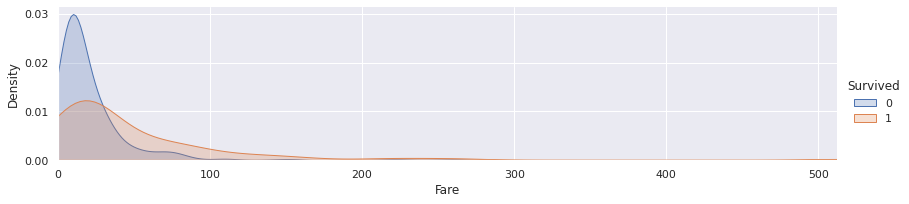

In [72]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4) # 운임이 싼 사람들이 상대적으로 많이 죽음
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()  

(0.0, 20.0)

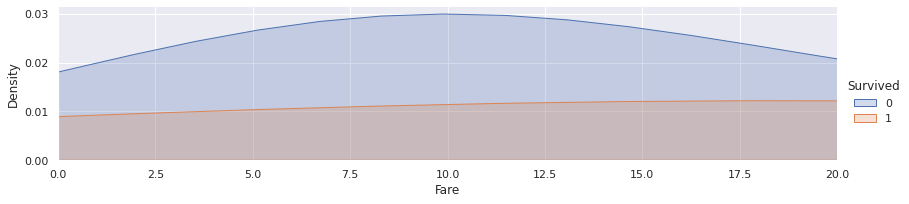

In [73]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

(0.0, 30.0)

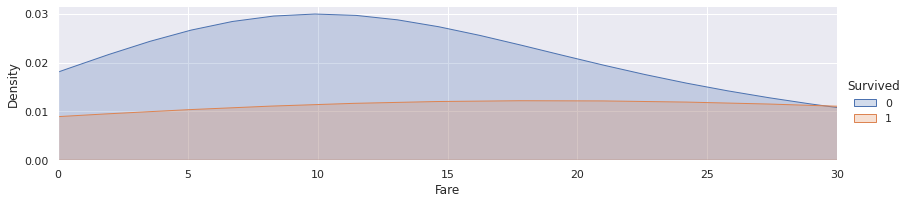

In [74]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)

(0.0, 512.3292)

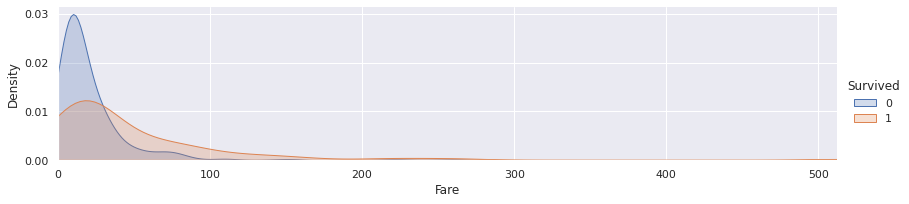

In [75]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0)

In [76]:
# for dataset in train_test_data:
#     dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
#     dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
#     dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
#     dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

ValueError: ignored

In [77]:
for dataset in train_test_data:
  dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0

In [78]:
for dataset in train_test_data:
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1

In [79]:
for dataset in train_test_data:
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2

In [80]:
for dataset in train_test_data:
  dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [81]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0  1.0      1      0         A/5 21171   
1            2         1       1    1  3.0      1      0          PC 17599   
2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
3            4         1       1    1  2.0      1      0            113803   
4            5         0       3    0  2.0      0      0            373450   

   Fare Cabin  Embarked  Title  
0   0.0   NaN         0      0  
1   2.0   C85         1      2  
2   0.0   NaN         0      1  
3   2.0  C123         0      2  
4   0.0   NaN         0      0

In [82]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [84]:
for dataset in train_test_data: # Cabin 열에서 뒤에 숫자 제외하고 문자만 따줌
    dataset['Cabin'] = dataset['Cabin'].str[:1]

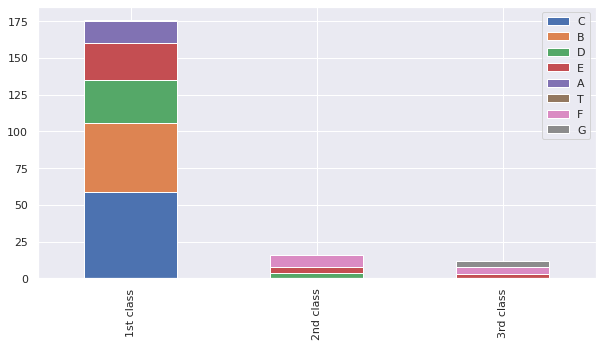

In [85]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [86]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [87]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True) # 등급별 페어의 중간값을 운임 NaN에 넣어줌
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [101]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1 # 가족과 함께 탔는지 여부 파악 위해서, 가족 수를 구함. 근데 + 1은 뭐지??
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0.0, 11.0)

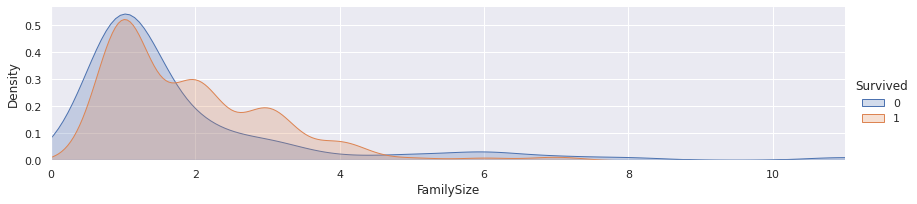

In [102]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4) # 가족이 있으면 상대적으로 더 생존함
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [103]:
# feature scailing
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [104]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0  1.0      1      0         A/5 21171   
1            2         1       1    1  3.0      1      0          PC 17599   
2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
3            4         1       1    1  2.0      1      0            113803   
4            5         0       3    0  2.0      0      0            373450   

   Fare  Cabin  Embarked  Title  FamilySize  
0   0.0    2.0         0      0         0.4  
1   2.0    0.8         1      2         0.4  
2   0.0    2.0         0      1         0.0  
3   2.0    0.8         0      2         0.4  
4   0.0    2.0         0      0         0.0

In [106]:
features_drop = ['Ticket', 'SibSp', 'Parch'] # Cabin에 운임 넣어주고, Family Size에 SibSp, Parch 넣었기 때문에 data set에서 지움
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

KeyError: ignored

In [107]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [108]:
train_data.head(10)

Pclass  Sex  Age  Fare  Cabin  Embarked  Title  FamilySize
0       3    0  1.0   0.0    2.0         0      0         0.4
1       1    1  3.0   2.0    0.8         1      2         0.4
2       3    1  1.0   0.0    2.0         0      1         0.0
3       1    1  2.0   2.0    0.8         0      2         0.4
4       3    0  2.0   0.0    2.0         0      0         0.0
5       3    0  2.0   0.0    2.0         2      0         0.0
6       1    0  3.0   2.0    1.6         0      0         0.0
7       3    0  0.0   1.0    2.0         0      3         1.6
8       3    1  2.0   0.0    2.0         0      2         0.8
9       2    1  0.0   2.0    1.8         1      2         0.4

In [109]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [110]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    int64  
 8   FamilySize  891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


In [112]:
from sklearn.model_selection import KFold                                       # Cross Validation (K-fold)
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [115]:
clf = KNeighborsClassifier(n_neighbors = 13)                                    # kNN. n_neighbors?
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring) # cross_val_score 파라미터들의 의미?
print(score)

[0.81111111 0.7752809  0.82022472 0.83146067 0.85393258 0.83146067
 0.82022472 0.80898876 0.83146067 0.80898876]


In [114]:
# kNN Score
round(np.mean(score)*100, 2)

81.93

In [116]:
clf = DecisionTreeClassifier()                                                  # Decision Tree
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.83146067 0.76404494 0.7752809  0.8988764  0.76404494
 0.83146067 0.82022472 0.74157303 0.79775281]


In [117]:
# decision tree Score
round(np.mean(score)*100, 2)

79.91

In [118]:
clf = RandomForestClassifier(n_estimators=13)                                   # Ramdom Forest. n_estimators?
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.77777778 0.83146067 0.76404494 0.79775281 0.86516854 0.78651685
 0.84269663 0.80898876 0.74157303 0.80898876]


In [119]:
# Random Forest Score
round(np.mean(score)*100, 2)

80.25

In [120]:
clf = GaussianNB()                                                              # Naive Bayes
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


In [121]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

78.78

In [122]:
clf = SVC()                                                                     # SVM
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.79775281 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.84269663 0.86516854]


In [123]:
round(np.mean(score)*100,2)

83.5

In [124]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [125]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [126]:
submission = pd.read_csv('submission.csv')
submission.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

Reference
https://www.youtube.com/watch?v=aqp_9HV58Ls&list=PLUu-A-mtBg8ZLWT7tXZvEBDGVhX1xo-7r&index=5
https://github.com/minsuk-heo/kaggle-titanic/blob/master/titanic-solution.ipynb